In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


# Binary Classification

In [75]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [76]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# getting shape
print(df.shape)

(10000, 14)


In [78]:
# checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [79]:
# checking is there any duplicated row exist
df.duplicated().sum()

0

In [80]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [81]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [82]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [83]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [84]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [86]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [87]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)

In [88]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [89]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [90]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [91]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=1)

In [93]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)

(10000, 11)
(10000,)
(8000, 11)
(8000,)


In [95]:
# Now we know that our data value is not scale properply so we preprocess this
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [99]:
# Now our data values scaled properly now we are able to use keras and tensorflow for to create our ANN
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [100]:
# Now creating sequentail model
model = Sequential()

In [102]:
# building architectures of NN
model.add(Dense(3, activation='sigmoid', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
 dense_4 (Dense)             (None, 3)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
# binary_crossentropy we can also say it logloss
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [105]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8180 - accuracy: 0.2028 - val_loss: 0.7216 - val_accuracy: 0.2025
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6567 - accuracy: 0.6809 - val_loss: 0.6037 - val_accuracy: 0.7975
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5711 - accuracy: 0.7972 - val_loss: 0.5456 - val_accuracy: 0.7975
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5316 - accuracy: 0.7972 - val_loss: 0.5202 - val_accuracy: 0.7975
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5147 - accuracy: 0.7972 - val_loss: 0.5100 - val_accuracy: 0.7975
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5080 - accuracy: 0.7972 - val_loss: 0.5060 - val_accuracy: 0.7975
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5056 - accuracy: 0.7972 - val_loss: 0.5045 - val_accuracy: 0.7975
Epoch 

In [106]:
# outputs
model.layers[0].get_weights()


[array([[ 0.32222003,  0.22554518, -0.48777437],
        [ 0.62648594, -0.33606112,  0.20295572],
        [ 0.60511994, -0.5025424 , -0.40163213],
        [ 0.597479  , -0.65648884,  0.21355624],
        [ 0.21722627,  0.22119434, -0.26126984],
        [ 0.6391493 ,  0.59937847,  0.3199337 ],
        [ 0.547907  , -0.12890875, -0.25621933],
        [ 0.18542153,  0.52971673, -0.08508435],
        [-0.4217559 ,  0.47207293,  0.582091  ],
        [-0.31528842,  0.14752549, -0.06741661],
        [-0.26483768, -0.4773152 , -0.03474873]], dtype=float32),
 array([ 0.0000000e+00, -1.5881360e-03, -6.5634675e-10], dtype=float32)]

In [107]:
# to predict
model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


array([[0.20607659],
       [0.20674191],
       [0.20716332],
       ...,
       [0.20793556],
       [0.2055447 ],
       [0.20580454]], dtype=float32)

In [108]:
# converting above probabilities into 0/1
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [109]:
y_pred = np.where(y_log>0.5, 1, 0)

In [110]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [111]:
# checking accuracy
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test, y_pred)

0.7925

In [113]:
import matplotlib.pyplot as plt

In [115]:
history.history

{'loss': [0.8180487155914307,
  0.65671706199646,
  0.5710920691490173,
  0.5315868854522705,
  0.5147146582603455,
  0.5080497860908508,
  0.5055555105209351,
  0.5046741366386414,
  0.5044047832489014,
  0.5043131709098816],
 'accuracy': [0.20281249284744263,
  0.6809375286102295,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574],
 'val_loss': [0.7216441631317139,
  0.6037496328353882,
  0.5455934405326843,
  0.5202168226242065,
  0.5099794864654541,
  0.5059670805931091,
  0.5044957399368286,
  0.5040228366851807,
  0.5038671493530273,
  0.5038295984268188],
 'val_accuracy': [0.20250000059604645,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147]}

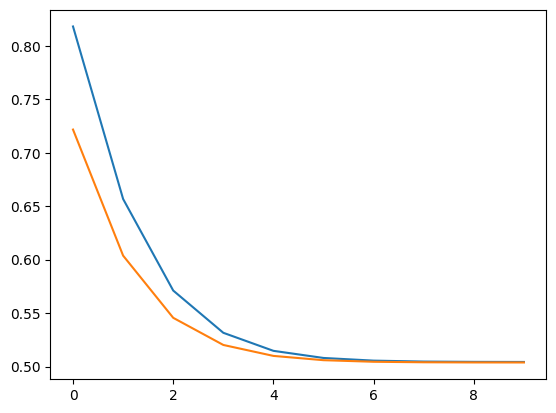

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

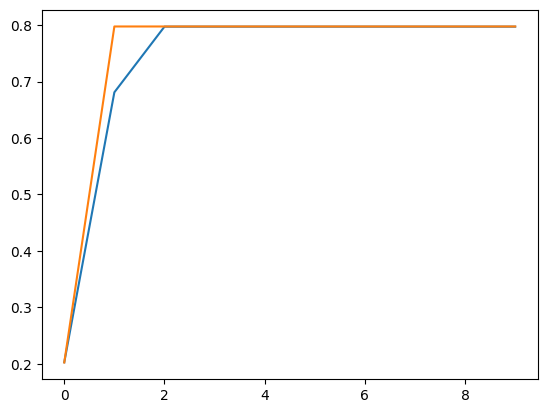

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])